In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
def generations(var,N,t_tot,um,uM, s):
    #initialize M allele freqs to 0 for burn in period
    f0M = 0
    f1M = 0
    #random freqs that add to 1 for m alleles
    rand_nums = np.random.dirichlet(np.ones(2), size=1)
    f0m, f1m = rand_nums.flatten()
    #t and current_wait are counters to keep track of generation and current wait time
    t = 0
    current_wait = 0
    #initialize to N - will change depending on variance
    wait_time = N
    #environment options
    envs = [0,1]
    #choose random at the start
    env = random.choice(envs)
    # burn in period of 1000 generations
    t = 0
    current_wait = 0
    #only want it to run for 1000 generations or until alleles fix
    while t < 1000 and f0M + f1M < 1 and f0M + f1M > 0:
        if current_wait >= wait_time:
            #if selected environment is 0 when wait time is reached, flip it
            if env == 0:
                env = 1
            else: 
                #if selected environment is 1 when wait time is reached, flip it
                env = 0
            current_wait = 0
            if var == 0:
                #environments switch every 20 generations when variance is 0, N = 20
                wait_time = N
            else:
                #shape and scale paramaters to find wait time
                b = var / N
                a = N / b
                wait_time = np.random.gamma(a,b)
        #ENVIRONMENT 0
        if env == 0:    
            #fitnesses for environment 0
            WA = 1
            Wa = 1 - s
            wmean = WA*(f0M + f0m) + Wa*(f1M + f1m)
            f0m_ = (WA*(1-um)*f0m + Wa*um*f1m) / wmean
            f0M_ = (WA*(1-uM)*f0M + Wa*uM*f1M) / wmean
            f1m_ = (WA*um*f0m + Wa*(1-um)*f1m) / wmean
            f1M_ = (WA*uM*f0M + Wa*(1-uM)*f1M) / wmean
            #update freq variables
            f0m = f0m_
            f0M = f0M_
            f1m = f1m_
            f1M = f1M_
        #ENVIRONMENT 1
        else: 
            #fitnesses for environment 1
            WA = 1 - s
            Wa = 1
            wmean = WA*(f0M + f0m) + Wa*(f1M + f1m)
            f0m_ = (WA*(1-um)*f0m + Wa*um*f1m) / wmean
            f0M_ = (WA*(1-uM)*f0M + Wa*uM*f1M) / wmean
            f1m_ = (WA*um*f0m + Wa*(1-um)*f1m) / wmean
            f1M_ = (WA*uM*f0M + Wa*(1-uM)*f1M) / wmean
            #update freq variables
            f0m = f0m_
            f0M = f0M_
            f1m = f1m_
            f1M = f1M_
        #increment by 1 for next generation and current wait time
        t += 1
        current_wait += 1
    #burn in period done, now add new frequencies for M alleles - need to sum to 10e-4
    f0M = np.random.uniform(0,0.0001)
    f1M = 0.0001 - f0M
    #subtract what was added into the population from the m alleles 
    f0m = f0m - (0.5 * 0.0001)
    f1m = f1m - (0.5 * 0.0001)
    #again initialize generation and current wait time counters to 0 for new generation runs
    t = 0
    current_wait = 0
    wait_time = N
    #only want it to run a total of 100k generations or until fixation occurs
    while t < t_tot and f0M + f1M < 1 and f0M + f1M > 0:
        if current_wait >= wait_time:
            #flip environments when wait time is reaches
            if env == 0:
                env = 1
            else: 
                env = 0
            current_wait = 0
            if var == 0:
                wait_time = N
            else:
                b = var / N
                a = N / b
                wait_time = np.random.gamma(a,b)
        #ENVIRONMENT 0
        if env == 0:   
            #fitnesses for environment 0
            WA = 1
            Wa = 1 - s
            wmean = WA*(f0M + f0m) + Wa*(f1M + f1m)
            f0m_ = (WA*(1-um)*f0m + Wa*um*f1m) / wmean
            f0M_ = (WA*(1-uM)*f0M + Wa*uM*f1M) / wmean
            f1m_ = (WA*um*f0m + Wa*(1-um)*f1m) / wmean
            f1M_ = (WA*uM*f0M + Wa*(1-uM)*f1M) / wmean
            #update freq variables
            f0m = f0m_
            f0M = f0M_
            f1m = f1m_
            f1M = f1M_
        #ENVIRONMENT 1
        else:
            #fitnesses for environment 1
            WA = 1 - s
            Wa = 1
            wmean = WA*(f0M + f0m) + Wa*(f1M + f1m)
            f0m_ = (WA*(1-um)*f0m + Wa*um*f1m) / wmean
            f0M_ = (WA*(1-uM)*f0M + Wa*uM*f1M) / wmean
            f1m_ = (WA*um*f0m + Wa*(1-um)*f1m) / wmean
            f1M_ = (WA*uM*f0M + Wa*(1-uM)*f1M) / wmean
            #update freq variables
            f0m = f0m_
            f0M = f0M_
            f1m = f1m_
            f1M = f1M_
        t += 1
        current_wait += 1 
    #want to return total frequency of M alleles for next function
    return f0M + f1M
def simulations(numRuns, N, var, s):
    runs = 0
    #start with random um and uM values for the generation runs 
    um = np.random.uniform(0, 0.1)
    uM = np.random.uniform(0, 0.1)
    while runs < numRuns:
        f = generations(var, N, 100000, um, uM, s)
        #if fixation occurs for M alleles, the new wild type u is uM
        if f > 10e-4:
            selected_u = uM
        else:
            selected_u = um
        #new wild type
        um = selected_u
        #per the paper, select new modifier by multiplying wild type times value from exp. distribution of mean 1
        x = np.random.exponential(scale=1)
        uM = um * x
        #the updated um, uM values will be parameters for subsequent simulation
        runs += 1
    return (math.log10(selected_u))

In [23]:
simulations(500, 20, 400, 0.05)

-2.0631670755780696

In [4]:
#get a range of variance values to plot 
def ranges(var):
    switch_rates = []
    for i in range(0, 401, 50):
        rate = simulations(500, 20, i, 0.05)
        #output values from each variance into a list
        switch_rates.append(rate)
    return switch_rates

In [45]:
def runall():
    ranges(400)

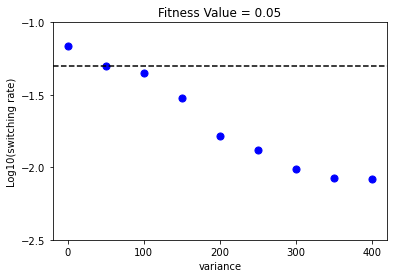

In [19]:
plt.scatter(variance_values, switching_rates, s= 50, color = 'blue')
plt.xlabel('variance')
plt.ylabel('Log10(switching rate)')
plt.title('Fitness Value = 0.05')
# Set the y-axis tick marks to -1.5, -2.0, -2.5
plt.yticks([-2.5, -2.0, -1.5, -1.0])
plt.xticks([0, 100, 200, 300, 400])
plt.axhline(y=math.log10(1/20), linestyle='dashed', color='black')

plt.show()